In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install gdown -qq

file_id = '1pIFQV49WPjpnJ4Y-30jucwUIQIlUEaDE'

!gdown --id {file_id} --output fraudTrain.csv

df = pd.read_csv('fraudTrain.csv')

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pIFQV49WPjpnJ4Y-30jucwUIQIlUEaDE
From (redirected): https://drive.google.com/uc?id=1pIFQV49WPjpnJ4Y-30jucwUIQIlUEaDE&confirm=t&uuid=37feb9ec-2aa8-401d-9098-32e798d35b82
To: /content/fraudTrain.csv
100% 351M/351M [00:05<00:00, 64.8MB/s]


In [ ]:
df.shape

(1296675, 23)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df["trans_date"] = pd.to_datetime(df["trans_date_trans_time"]).dt.date

In [ ]:
df["trans_date"]

,trans_date
0,2019-01-01
1,2019-01-01
2,2019-01-01
3,2019-01-01
4,2019-01-01
...,...
1296670,2020-06-21
1296671,2020-06-21
1296672,2020-06-21
1296673,2020-06-21


In [ ]:
df["trans_hour"] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour

In [ ]:
df["trans_hour"]

,trans_hour
0,0
1,0
2,0
3,0
4,0
...,...
1296670,12
1296671,12
1296672,12
1296673,12


In [ ]:
df['dob_date'] = pd.to_datetime(df['dob'])

In [ ]:
df['dob_date']

,dob_date
0,1988-03-09
1,1978-06-21
2,1962-01-19
3,1967-01-12
4,1986-03-28
...,...
1296670,1961-11-24
1296671,1979-12-11
1296672,1967-08-30
1296673,1980-08-18


In [ ]:
df['age'] = (datetime.now() - df['dob_date']).dt.days / 365.25

In [ ]:
df['age']

,age
0,37.894593
1,47.611225
2,64.030116
3,59.049966
4,39.843943
...,...
1296670,64.183436
1296671,46.138261
1296672,58.420260
1296673,45.451061


In [ ]:
df['distance_km'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2) * 111

In [ ]:
df['distance_km']

,distance_km
0,96.884075
1,30.226415
2,108.318831
3,102.097971
4,96.404010
...,...
1296670,130.728255
1296671,90.979104
1296672,107.397093
1296673,99.764031


In [ ]:
# Fraud rate preview
print(df['is_fraud'].value_counts(normalize=True))

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64


category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64


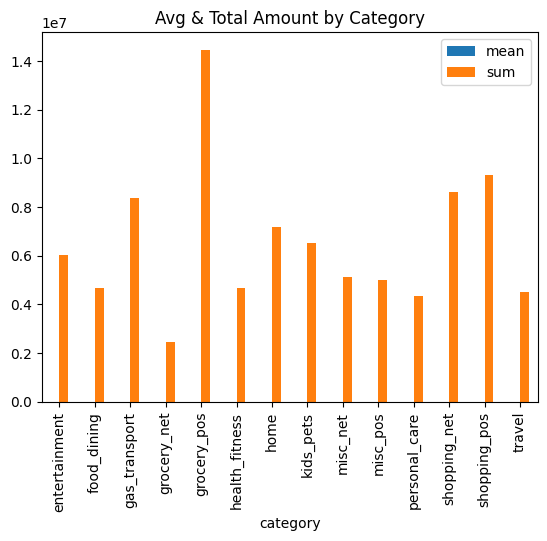

In [ ]:
# EDA: Top categories by fraud/amt
fraud_df = df[df['is_fraud'] == 1]
print(fraud_df['category'].value_counts())
df.groupby('category')['amt'].agg(['mean', 'sum']).plot(kind='bar')
plt.title('Avg & Total Amount by Category')
plt.show()

In [ ]:
# Cleaned data
df_clean = df[['trans_date', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'age', 'job', 'trans_hour', 'distance_km', 'is_fraud']].dropna()
df_clean.to_csv('fraud_clean.csv', index=False)

In [ ]:
df_clean

,trans_date,cc_num,merchant,category,amt,gender,state,age,job,trans_hour,distance_km,is_fraud
0,2019-01-01,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,37.894593,"Psychologist, counselling",0,96.884075,0
1,2019-01-01,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,47.611225,Special educational needs teacher,0,30.226415,0
2,2019-01-01,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,64.030116,Nature conservation officer,0,108.318831,0
3,2019-01-01,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,59.049966,Patent attorney,0,102.097971,0
4,2019-01-01,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,39.843943,Dance movement psychotherapist,0,96.404010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,UT,64.183436,Geoscientist,12,130.728255,0
1296671,2020-06-21,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,MD,46.138261,"Production assistant, television",12,90.979104,0
1296672,2020-06-21,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,58.420260,Naval architect,12,107.397093,0
1296673,2020-06-21,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,45.451061,Volunteer coordinator,12,99.764031,0


In [ ]:
print('Cleaned data saved: fraud_clean.csv')


Cleaned data saved: fraud_clean.csv


In [ ]:
from google.colab import files
files.download('fraud_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>